In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
nobel = pd.read_csv(r'C:\Users\Lenovo\Python\Datacamp Python study sheet\nobel_prizes_dataset\nobel_final.csv')

In [27]:
nobel.head(50)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56,False,1900,False
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49,False,1900,False
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37,False,1900,False
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51,False,1900,False
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44,False,1900,False
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True
6,Marie,Curie,PL,FR,female,1911,chemistry,1,Sorbonne University,Paris,France,Nov,67,44,False,1910,True
7,Lord,Rayleigh,GB,GB,male,1904,physics,1,Royal Institution of Great Britain,London,United Kingdom,Nov,77,62,False,1900,False
8,Philipp,Lenard,SK,DE,male,1905,physics,1,Kiel University,Kiel,Germany,Jun,85,43,False,1900,False
9,J.J.,Thomson,GB,GB,male,1906,physics,1,University of Cambridge,Cambridge,United Kingdom,Dec,84,50,False,1900,False


In [13]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
display(len(nobel))
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['gender'].value_counts())
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
nobel['born_country_code'].value_counts().head(10)

923

male      869
female     54
Name: gender, dtype: int64

US    274
GB    103
DE     82
FR     56
SE     29
PL     28
JP     27
RU     26
CA     20
CH     19
Name: born_country_code, dtype: int64

In [18]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['born_country_code']=='US'
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017857
1,1910,0.078947
2,1920,0.074074
3,1930,0.254545
4,1940,0.325000
5,1950,0.295775
6,1960,0.280000
7,1970,0.320388
8,1980,0.329787
9,1990,0.415842


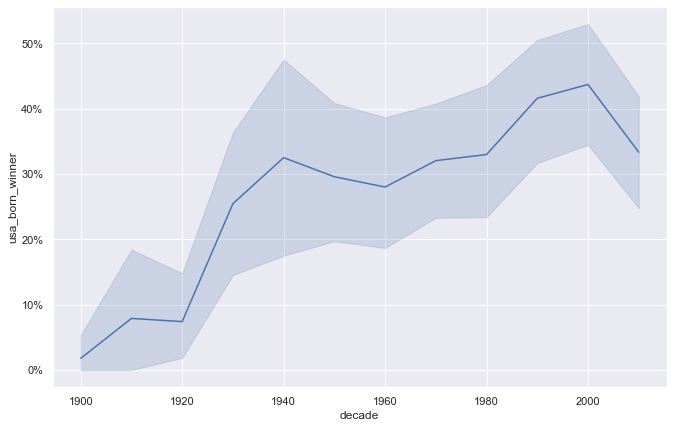

In [19]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=nobel)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

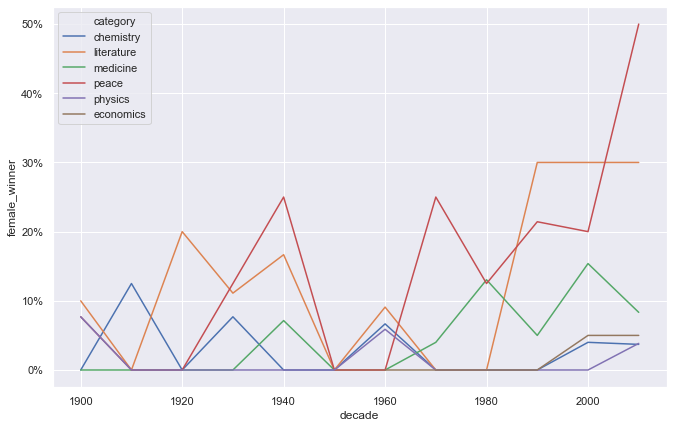

In [20]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['gender']=='female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()
prop_female_winners
# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data= prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [21]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel['female_winner']==True].nsmallest(1,'year')

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True


In [26]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
nobel.groupby('firstname').filter(lambda x: len(x)>1)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51,False,1900,False
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True
6,Marie,Curie,PL,FR,female,1911,chemistry,1,Sorbonne University,Paris,France,Nov,67,44,False,1910,True
7,Lord,Rayleigh,GB,GB,male,1904,physics,1,Royal Institution of Great Britain,London,United Kingdom,Nov,77,62,False,1900,False
11,Gabriel,Lippmann,LU,NaN,male,1908,physics,1,Sorbonne University,Paris,France,Aug,76,63,False,1900,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,James,Peebles,CA,NaN,male,2019,physics,2,Princeton University,Princeton NJ,USA,Apr,85,84,False,2010,False
914,John,Goodenough,DE,NaN,male,2019,chemistry,3,University of Texas,Austin TX,USA,Jul,98,97,False,2010,False
916,Akira,Yoshino,JP,NaN,male,2019,chemistry,3,Asahi Kasei Corporation,Tokyo,Japan,Jan,72,71,False,2010,False
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77,False,2010,False


In [24]:
nobel.groupby('surname').filter(lambda x: len(x)>1)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44,False,1900,False
5,Marie,Curie,PL,FR,female,1903,physics,4,NaN,NaN,NaN,Nov,67,36,False,1900,True
6,Marie,Curie,PL,FR,female,1911,chemistry,1,Sorbonne University,Paris,France,Nov,67,44,False,1910,True
9,J.J.,Thomson,GB,GB,male,1906,physics,1,University of Cambridge,Cambridge,United Kingdom,Dec,84,50,False,1900,False
19,William,Bragg,GB,GB,male,1915,physics,2,University College,London,United Kingdom,Jul,80,53,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Jeffrey C.,Hall,US,NaN,male,2017,medicine,3,University of Maine,Maine ME,USA,May,75,72,True,2010,False
892,Joachim,Frank,DE,NaN,male,2017,chemistry,3,Columbia University,New York NY,USA,Sep,80,77,False,2010,False
893,Richard,Henderson,GB,NaN,male,2017,chemistry,3,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,Jul,75,72,False,2010,False
902,George P.,Smith,US,NaN,male,2018,chemistry,4,University of Missouri,Columbia,USA,Mar,79,77,True,2010,False


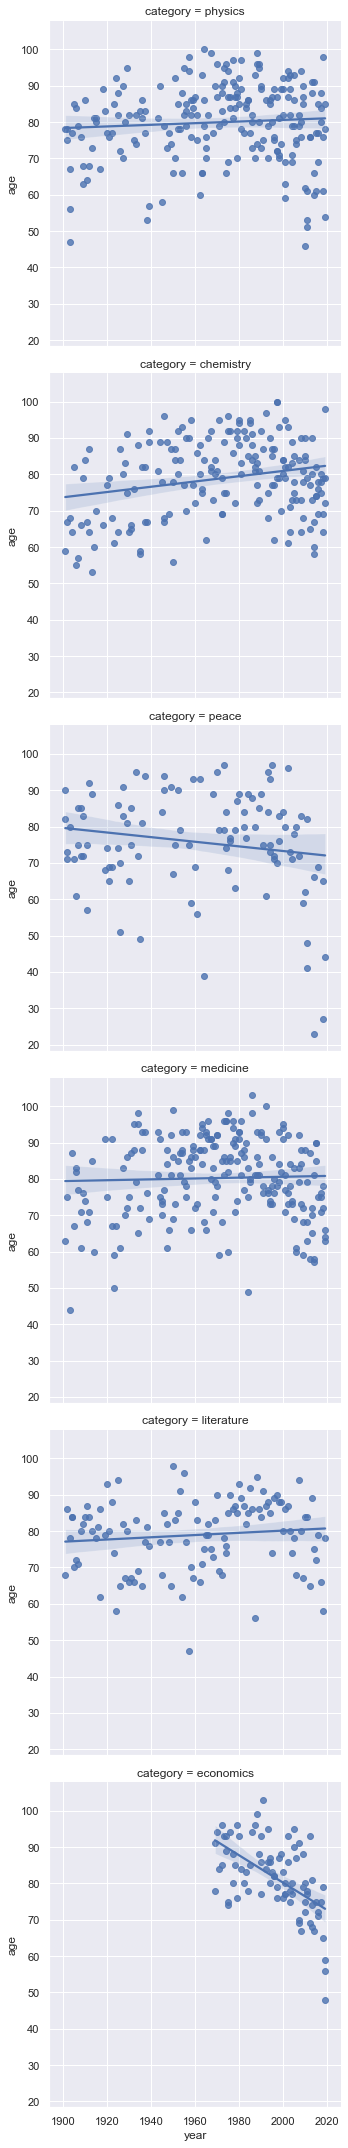

In [30]:
# Same plot as above, but separate plots for each type of Nobel Prize
# ... YOUR CODE FOR TASK 9 ...
sns.lmplot(x='year', y='age', data=nobel, row='category')

In [31]:
# The oldest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nlargest(1, 'age'))
# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
nobel.nsmallest(1, 'age')

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
433,Rita,Levi-Montalcini,IT,IT,female,1986,medicine,2,Institute of Cell Biology of the C.N.R.,Rome,Italy,Apr,103,77,False,1980,True


,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,usa_born_winner,decade,female_winner
862,Malala,Yousafzai,PK,NaN,female,2014,peace,2,NaN,NaN,NaN,Jul,23,17,False,2010,True
